<a href="https://colab.research.google.com/github/NiMadeSriUlandari/Tugas1-PembelajaranMesin-E1E121007-NiMadeSriUlandari/blob/main/Tugas1_Pembelajaran_Mesin_Ni_Made_Sri_Ulandari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Memuat dataset Kanker Payudara
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Menggunakan PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [5]:
# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

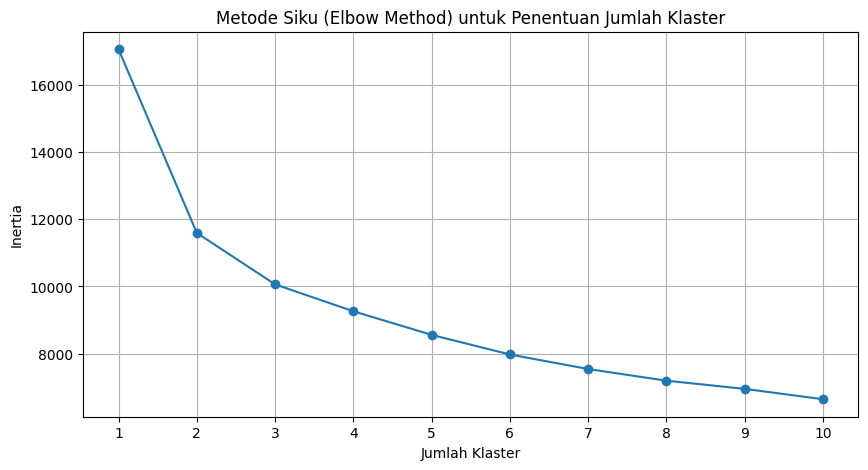

In [10]:
# Melakukan clustering dengan K-Means untuk berbagai nilai n_clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualisasi metode siku (elbow method)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Metode Siku (Elbow Method) untuk Penentuan Jumlah Klaster')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


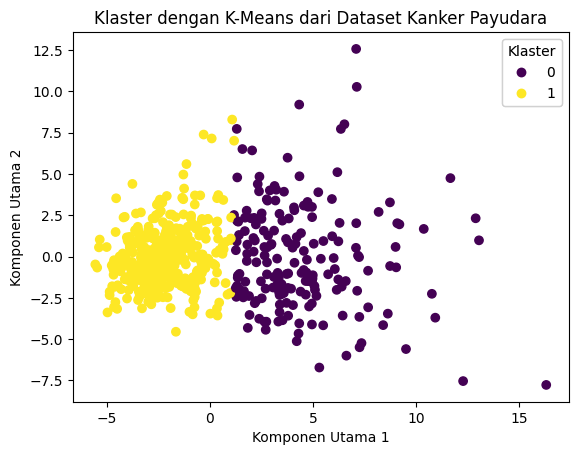

In [11]:
# Visualisasi klaster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.title('Klaster dengan K-Means dari Dataset Kanker Payudara')

# Membuat legenda
legend1 = plt.legend(*scatter.legend_elements(),
                    title="Klaster")
plt.gca().add_artist(legend1)

plt.show()
